# Examen BI - Master 2 BI/SIGL 2023/2024
## Djiadji DIAW - Penda DIOUF

### Importation des packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pickle

from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

### Préparation des données

In [2]:
# Lire la base de données
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
# Voir les valeurs maquantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.isna().values.any()

False

In [5]:
# Suppression de la colonne Time
df.drop(columns=['Time'], axis=1, inplace=True)
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [6]:
# Normailsation des valeurs du Montant
rob_scaler = RobustScaler()

df['Scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df.drop(columns=['Amount'], axis=1, inplace=True)


In [7]:
# Séparation en variables explicatives (X) et variable cible (y)
X = df.drop('Class', axis=1)
y = df['Class']

### Analyse préparatoire

In [8]:
y.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [9]:
LABELS = ["Normal", "Fraude"]
fig = px.pie(df.Class, values=df.Class.value_counts().values,
              names=LABELS, title="Distribution des transactions Normales et Frauduleuses")
fig.show()

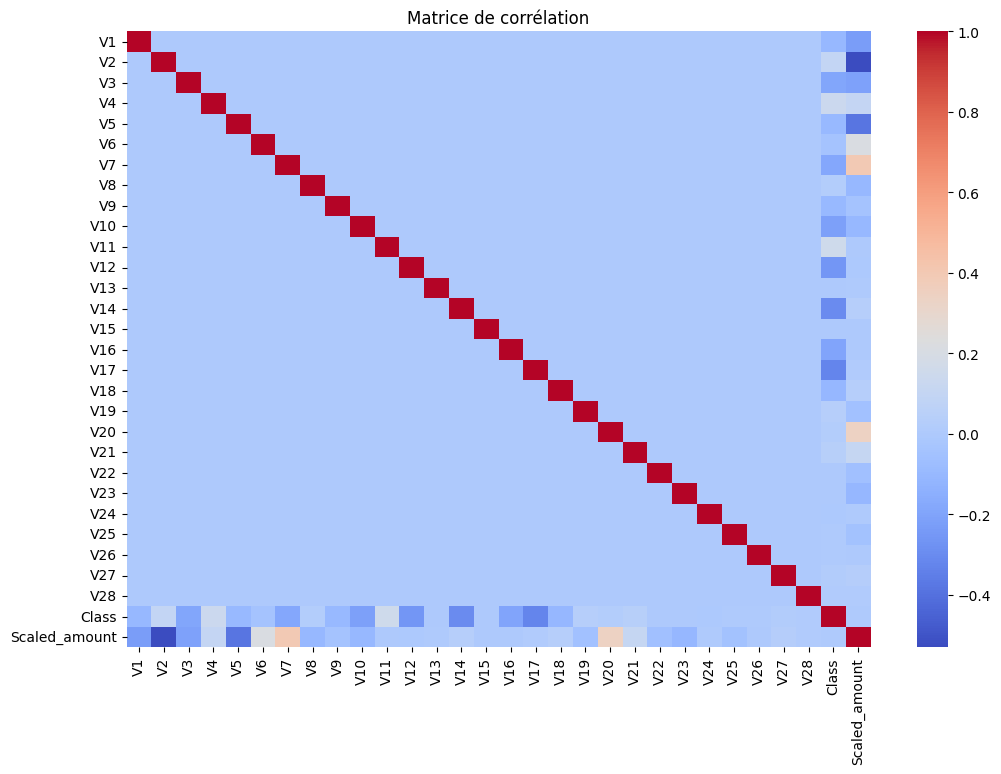

In [10]:
# Matrice de corrélation
correlation_matrix = df.corr()

# Visualisation de la matrice de corrélation
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f")
plt.title('Matrice de corrélation')
plt.show()

Text(0, 0.5, 'Class')

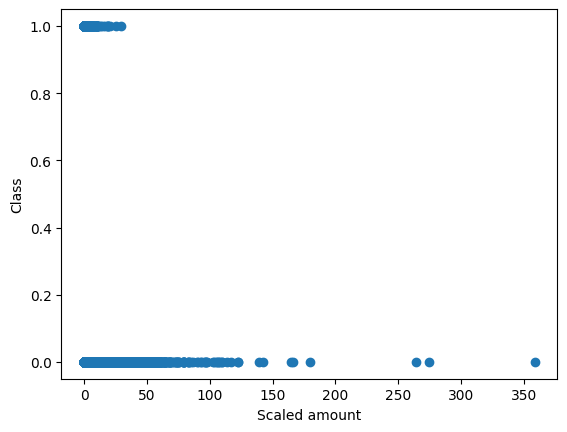

In [11]:
plt.scatter(X['Scaled_amount'], y)
plt.xlabel("Scaled amount")
plt.ylabel("Class")

Text(0, 0.5, 'Class')

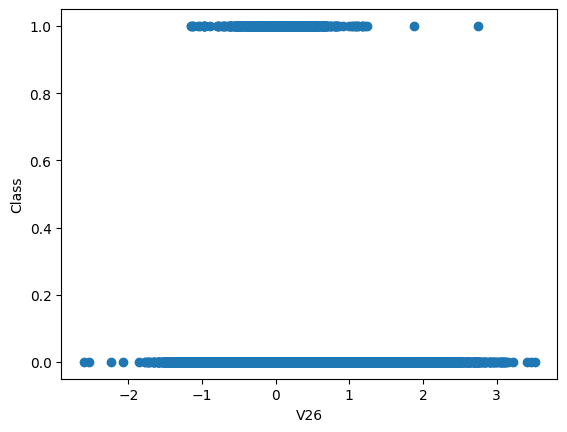

In [12]:
plt.scatter(X['V26'], y)
plt.xlabel("V26")
plt.ylabel("Class")

### Réalisation du modèle

In [13]:
# Séparer les données de test et. d'entrainement
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train,test in sss.split(X,y):
  X_train,X_test=X.iloc[train],X.iloc[test]
  y_train,y_test=y.iloc[train],y.iloc[test]

print("X_train taille ", X_train.shape)
print("X_test taille ", X_test.shape)
print("y_train taille ", y_train.shape)
print("y_test taille ", y_test.shape)

X_train taille  (227845, 29)
X_test taille  (56962, 29)
y_train taille  (227845,)
y_test taille  (56962,)


In [14]:
# Modèles d'ensemble
models = [
    ("Random Forest", RandomForestClassifier(random_state = 42)),
    ("Ada Boost Classifier", AdaBoostClassifier(random_state = 42)),
    ("Gradient Boosting Classifier", GradientBoostingClassifier(random_state = 42)),
    ('Decision Tree Classifier', DecisionTreeClassifier(random_state = 42, max_depth=1))
]

for model_name, model in models:
    # Entraînement sur les données d'entraînement
    model.fit(X_train, y_train)

    # Prédiction sur les données de test
    predictions = model.predict(X_test)

    # Évaluation du modèle
    print(f"\nLa précision du modèle ({model_name}): {accuracy_score(y_test, predictions)}")
    print(f"\nClassification Report ({model_name}):")
    print(classification_report(y_test, predictions))
    print(f"Confusion Matrix ({model_name}):")
    print(confusion_matrix(y_test, predictions))



La précision du modèle (Random Forest): 0.9996137776061234

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.83      0.88        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix (Random Forest):
[[56859     5]
 [   17    81]]

La précision du modèle (Ada Boost Classifier): 0.9991222218320986

Classification Report (Ada Boost Classifier):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.74      0.74      0.74        98

    accuracy                           1.00     56962
   macro avg       0.87      0.87      0.87     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix (Ada Boost Classifier):
[[56839    25]
 [   25    

In [19]:
X_2 = X[['V1', 'V5', 'V10', 'V15', 'Scaled_amount']]

for train,test in sss.split(X_2,y):
  X2_train,X2_test=X_2.iloc[train],X_2.iloc[test]
  y_train,y_test=y.iloc[train],y.iloc[test]

print("X2_train taille ", X2_train.shape)
print("X2_test taille ", X2_test.shape)
print("y_train taille ", y_train.shape)
print("y_test taille ", y_test.shape)

X2_train taille  (227845, 5)
X2_test taille  (56962, 5)
y_train taille  (227845,)
y_test taille  (56962,)


In [20]:
# Initialisation du modèle
rf_model = RandomForestClassifier(random_state=42)

# Entraînement sur les données d'entraînement
rf_model.fit(X2_train, y_train)

# Prédiction sur les données de test
predictions = rf_model.predict(X2_test)

# Évaluation du modèle
print(f"\nLa précision du modèle: {accuracy_score(y_test, predictions)}")
print(f"\nClassification Report:")
print(classification_report(y_test, predictions))
print(f"Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

pickle.dump(rf_model, open('model2.pkl', 'wb'))


La précision du modèle: 0.9991573329588147

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.59      0.71        98

    accuracy                           1.00     56962
   macro avg       0.94      0.80      0.85     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
[[56856     8]
 [   40    58]]


### Optimisation du model

In [16]:
from sklearn.model_selection import GridSearchCV

# Définition de la grille des hyperparamètres à tester
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4]
}

# Initialisation du modèle
rf_model = RandomForestClassifier(random_state=42)

# Recherche par grille
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=3, scoring='recall', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Meilleurs hyperparamètres
best_params_rf = grid_search_rf.best_params_

# Utilisation des meilleurs hyperparamètres
best_rf_model = grid_search_rf.best_estimator_

# Utilisation du meilleur modèle sur les données de test
y_pred_rf_best = best_rf_model.predict(X_test)

# Évaluation du modèle avec les meilleurs hyperparamètres
print("Classification Report (Random Forest - Best Hyperparameters):")
print(classification_report(y_test, y_pred_rf_best))
print("Confusion Matrix (Random Forest - Best Hyperparameters):")
print(confusion_matrix(y_test, y_pred_rf_best))

KeyboardInterrupt: 